In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%pip install plotly
import joblib

In [ ]:
df_inicial=pd.read_csv('DadosTotais_SemiTratados.csv')

In [ ]:
df_inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8867 entries, 0 to 8866
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     8867 non-null   object 
 1   estado                   8867 non-null   object 
 2   municipio                8867 non-null   object 
 3   bioma                    8867 non-null   object 
 4   diasemchuva              8867 non-null   float64
 5   precipitacao             8867 non-null   float64
 6   riscofogo                8867 non-null   float64
 7   latitude                 8867 non-null   float64
 8   longitude                8867 non-null   float64
 9   frp                      8631 non-null   float64
 10  Hora (UTC)               8867 non-null   float64
 11  Temp. [Hora] (C)         8867 non-null   float64
 12  Umi. (%)                 8867 non-null   float64
 13  Pressao (hPa)            8867 non-null   float64
 14  Vel. Vento (m/s)        

In [ ]:
df_inicial.isnull().sum()


Data                         0
estado                       0
municipio                    0
bioma                        0
diasemchuva                  0
precipitacao                 0
riscofogo                    0
latitude                     0
longitude                    0
frp                        236
Hora (UTC)                   0
Temp. [Hora] (C)             0
Umi. (%)                     0
Pressao (hPa)                0
Vel. Vento (m/s)             0
Dir. Vento (m/s)             0
Nebulosidade (Decimos)       0
Insolacao (h)                0
Temp. Max. [Diaria] (h)      0
Temp. Min. [Diaria] (h)      0
Chuva [Diaria] (mm)          0
dtype: int64

In [ ]:
df_inicial.head(20)

,Data,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,...,Temp. [Hora] (C),Umi. (%),Pressao (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Nebulosidade (Decimos),Insolacao (h),Temp. Max. [Diaria] (h),Temp. Min. [Diaria] (h),Chuva [Diaria] (mm)
0,07/10/2021,PARA,ALTAMIRA,Amazonia,0.0,3.1,0.1,-8.09621,-54.77356,12.5,...,28.2,78.94,999.56,0.94,130.0,6.68,6.3,32.89,22.33,6.56
1,07/10/2021,PARA,ALTAMIRA,Amazonia,0.0,2.8,0.1,-8.18397,-54.81675,18.6,...,28.2,78.94,999.56,0.94,130.0,6.68,6.3,32.89,22.33,6.56
2,07/10/2021,PARA,ALTAMIRA,Amazonia,0.0,2.6,0.1,-8.19341,-54.81541,12.1,...,28.2,78.94,999.56,0.94,130.0,6.68,6.3,32.89,22.33,6.56
3,07/10/2021,PARA,ALTAMIRA,Amazonia,0.0,2.6,0.6,-8.20493,-55.17908,17.1,...,28.2,78.94,999.56,0.94,130.0,6.68,6.3,32.89,22.33,6.56
4,07/10/2021,PARA,ALTAMIRA,Amazonia,0.0,1.5,0.4,-8.27370,-54.79735,8.8,...,28.2,78.94,999.56,0.94,130.0,6.68,6.3,32.89,22.33,6.56
5,07/10/2021,PARA,ALTAMIRA,Amazonia,3.0,0.6,0.9,-7.46966,-54.96648,7.7,...,28.2,78.94,999.56,0.94,130.0,6.68,6.3,32.89,22.33,6.56
6,07/10/2021,PARA,ALTAMIRA,Amazonia,0.0,3.1,0.0,-7.77908,-54.99632,12.0,...,28.2,78.94,999.56,0.94,130.0,6.68,6.3,32.89,22.33,6.56
7,07/10/2021,PARA,ALTAMIRA,Amazonia,0.0,3.4,0.0,-7.78120,-54.98030,13.7,...,28.2,78.94,999.56,0.94,130.0,6.68,6.3,32.89,22.33,6.56
8,07/10/2021,PARA,ALTAMIRA,Amazonia,2.0,2.0,0.4,-8.40925,-54.79683,9.6,...,28.2,78.94,999.56,0.94,130.0,6.68,6.3,32.89,22.33,6.56
9,07/10/2021,PARA,ALTAMIRA,Amazonia,3.0,2.5,0.2,-8.48164,-54.65847,11.3,...,28.2,78.94,999.56,0.94,130.0,6.68,6.3,32.89,22.33,6.56


In [ ]:
df_inicial.describe()

,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,Hora (UTC),Temp. [Hora] (C),Umi. (%),Pressao (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Nebulosidade (Decimos),Insolacao (h),Temp. Max. [Diaria] (h),Temp. Min. [Diaria] (h),Chuva [Diaria] (mm)
count,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8631.000000,8867.0,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000
mean,20.039698,0.547790,0.760531,-6.866366,-54.312897,97.753771,1000.0,28.481127,75.908278,999.865729,1.136547,136.610278,5.788570,7.923977,34.656535,21.561784,3.023875
std,23.371214,2.947784,0.377384,1.317747,0.817088,223.492175,0.0,1.089833,5.866688,1.309172,0.727517,92.904011,1.915477,1.935314,1.679460,0.953045,5.266869
min,0.000000,0.000000,0.000000,-9.591500,-55.477000,0.000000,1000.0,24.000000,59.000000,995.500000,0.000000,0.000000,0.000000,0.000000,29.500000,18.800000,0.000000
25%,5.000000,0.000000,0.600000,-7.994975,-54.998000,20.850000,1000.0,28.200000,72.500000,999.350000,0.750000,63.333333,5.000000,6.300000,32.890000,20.900000,0.000000
50%,9.000000,0.000000,0.900000,-6.572850,-54.700450,40.900000,1000.0,28.200000,78.500000,999.560000,0.940000,130.000000,6.680000,7.700000,35.000000,22.000000,0.000000
75%,25.000000,0.000000,1.000000,-6.184000,-53.568630,87.900000,1000.0,28.950000,78.940000,1000.350000,1.433333,180.000000,6.680000,10.000000,36.200000,22.330000,6.560000
max,120.000000,114.400000,9.000000,-3.125210,-51.921000,5098.900000,1000.0,32.100000,95.000000,1004.500000,3.600000,360.000000,10.000000,11.000000,37.500000,23.500000,96.400000


In [ ]:
lista=[]
for i in df_inicial.iloc[:]:
    lista.append(df_inicial[i])
for i in lista:
    print(i.unique())


['07/10/2021' '05/09/2021' '03/09/2021' '01/09/2021' '06/09/2021'
 '10/09/2021' '07/09/2021' '09/09/2021' '11/09/2021' '12/09/2021'
 '29/08/2021' '30/08/2021' '31/08/2021' '14/09/2021' '15/09/2021'
 '16/09/2021' '17/09/2021' '18/09/2021' '19/09/2021' '20/09/2021'
 '21/09/2021' '22/09/2021' '23/09/2021' '24/09/2021' '25/09/2021'
 '26/09/2021' '28/09/2021' '30/09/2021' '01/10/2021' '04/10/2021'
 '05/10/2021' '08/10/2021' '09/10/2021' '13/10/2021' '14/10/2021'
 '16/10/2021' '21/10/2021' '28/10/2021' '30/10/2021' '01/11/2021'
 '03/11/2021' '05/11/2021' '07/11/2021' '08/11/2021' '12/11/2021'
 '17/11/2021' '24/11/2021' '26/11/2021' '10/12/2021' '14/08/2021'
 '14/09/2020' '15/08/2021' '15/09/2020' '16/09/2020' '16/08/2021'
 '17/08/2021' '18/09/2020' '19/09/2020' '20/09/2020' '18/08/2021'
 '21/09/2020' '22/09/2020' '23/09/2020' '25/09/2020' '20/08/2021'
 '27/09/2020' '28/09/2020' '29/09/2020' '21/08/2021' '30/09/2020'
 '22/08/2021' '01/10/2020' '02/10/2020' '04/10/2020' '05/10/2020'
 '06/10/20

[ 6.68        5.          7.5         6.          3.          6.5
  7.          4.          2.5         7.15        5.05        5.65
  6.3         4.4         3.75        6.9         6.25       10.
  3.8         8.15        8.5         9.5         5.5         8.
  3.15        9.          4.5         1.9         5.66666667  4.33333333
  6.33333333  5.33333333  4.66666667  3.33333333  7.66666667  6.66666667
  7.33333333  8.33333333  7.55        8.75        0.          1.25
  1.3       ]
[ 6.3 10.2  7.5  7.2  9.4  9.   9.5  8.7  4.7  3.9 10.   8.5  9.7 10.3
  9.6 10.8 10.1  9.3  7.8  7.9  7.6  7.4 10.6  8.   9.2  0.4 10.7  8.2
  0.   5.7  6.5  9.8  9.1  0.9  5.4  8.8  7.7  0.7  4.9  6.6  5.8  8.1
 10.5  7.3  6.4  6.9  8.6  1.9  5.9  9.9 11.   6.7  6.8  3.8  4.2  5.3
  5.1 10.4  2.3  1.4  3.1  4.5  5.5  7.1]
[32.89 35.4  36.2  35.   35.5  35.6  35.3  34.7  33.6  33.4  33.9  34.8
 35.8  36.9  36.3  36.7  36.6  35.7  34.6  36.4  31.2  34.1  34.3  29.5
 30.5  33.   33.1  34.   29.6  35.1  32.

In [ ]:
valores_unicos=df_inicial['Hora (UTC)'].unique()
print(valores_unicos)

[1000.]


In [ ]:
#A coluna Hora(UTC) só tem o valor 1000, então não faz diferença ter essa variável nos dados

In [ ]:
df_dropped_features=df_inicial.drop(columns=['Hora (UTC)','estado','bioma','precipitacao','municipio'])
df_dropped_features.head()

,Data,diasemchuva,riscofogo,latitude,longitude,frp,Temp. [Hora] (C),Umi. (%),Pressao (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Nebulosidade (Decimos),Insolacao (h),Temp. Max. [Diaria] (h),Temp. Min. [Diaria] (h),Chuva [Diaria] (mm)
0,07/10/2021,0.0,0.1,-8.09621,-54.77356,12.5,28.2,78.94,999.56,0.94,130.0,6.68,6.3,32.89,22.33,6.56
1,07/10/2021,0.0,0.1,-8.18397,-54.81675,18.6,28.2,78.94,999.56,0.94,130.0,6.68,6.3,32.89,22.33,6.56
2,07/10/2021,0.0,0.1,-8.19341,-54.81541,12.1,28.2,78.94,999.56,0.94,130.0,6.68,6.3,32.89,22.33,6.56
3,07/10/2021,0.0,0.6,-8.20493,-55.17908,17.1,28.2,78.94,999.56,0.94,130.0,6.68,6.3,32.89,22.33,6.56
4,07/10/2021,0.0,0.4,-8.27370,-54.79735,8.8,28.2,78.94,999.56,0.94,130.0,6.68,6.3,32.89,22.33,6.56


In [ ]:
df_dropped_features.describe()

,diasemchuva,riscofogo,latitude,longitude,frp,Temp. [Hora] (C),Umi. (%),Pressao (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Nebulosidade (Decimos),Insolacao (h),Temp. Max. [Diaria] (h),Temp. Min. [Diaria] (h),Chuva [Diaria] (mm)
count,8867.000000,8867.000000,8867.000000,8867.000000,8631.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000
mean,20.039698,0.760531,-6.866366,-54.312897,97.753771,28.481127,75.908278,999.865729,1.136547,136.610278,5.788570,7.923977,34.656535,21.561784,3.023875
std,23.371214,0.377384,1.317747,0.817088,223.492175,1.089833,5.866688,1.309172,0.727517,92.904011,1.915477,1.935314,1.679460,0.953045,5.266869
min,0.000000,0.000000,-9.591500,-55.477000,0.000000,24.000000,59.000000,995.500000,0.000000,0.000000,0.000000,0.000000,29.500000,18.800000,0.000000
25%,5.000000,0.600000,-7.994975,-54.998000,20.850000,28.200000,72.500000,999.350000,0.750000,63.333333,5.000000,6.300000,32.890000,20.900000,0.000000
50%,9.000000,0.900000,-6.572850,-54.700450,40.900000,28.200000,78.500000,999.560000,0.940000,130.000000,6.680000,7.700000,35.000000,22.000000,0.000000
75%,25.000000,1.000000,-6.184000,-53.568630,87.900000,28.950000,78.940000,1000.350000,1.433333,180.000000,6.680000,10.000000,36.200000,22.330000,6.560000
max,120.000000,9.000000,-3.125210,-51.921000,5098.900000,32.100000,95.000000,1004.500000,3.600000,360.000000,10.000000,11.000000,37.500000,23.500000,96.400000


In [ ]:
#O valor máximo de risco de fogo é 9 sendo que a variável tem seu valor máximo 1,0

In [ ]:
(df_dropped_features['riscofogo']==9).value_counts()

False    8861
True        6
Name: riscofogo, dtype: int64

In [ ]:
#Como existem somente 6 dados com valor 9, decidi substituir pelo valor máximo=1,0

In [ ]:
df_dropped_features['riscofogo']=np.where(df_dropped_features['riscofogo']==9, 1, df_dropped_features['riscofogo'])

In [ ]:
df_dropped_features.describe()

,diasemchuva,riscofogo,latitude,longitude,frp,Temp. [Hora] (C),Umi. (%),Pressao (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Nebulosidade (Decimos),Insolacao (h),Temp. Max. [Diaria] (h),Temp. Min. [Diaria] (h),Chuva [Diaria] (mm)
count,8867.000000,8867.000000,8867.000000,8867.000000,8631.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000
mean,20.039698,0.755118,-6.866366,-54.312897,97.753771,28.481127,75.908278,999.865729,1.136547,136.610278,5.788570,7.923977,34.656535,21.561784,3.023875
std,23.371214,0.310621,1.317747,0.817088,223.492175,1.089833,5.866688,1.309172,0.727517,92.904011,1.915477,1.935314,1.679460,0.953045,5.266869
min,0.000000,0.000000,-9.591500,-55.477000,0.000000,24.000000,59.000000,995.500000,0.000000,0.000000,0.000000,0.000000,29.500000,18.800000,0.000000
25%,5.000000,0.600000,-7.994975,-54.998000,20.850000,28.200000,72.500000,999.350000,0.750000,63.333333,5.000000,6.300000,32.890000,20.900000,0.000000
50%,9.000000,0.900000,-6.572850,-54.700450,40.900000,28.200000,78.500000,999.560000,0.940000,130.000000,6.680000,7.700000,35.000000,22.000000,0.000000
75%,25.000000,1.000000,-6.184000,-53.568630,87.900000,28.950000,78.940000,1000.350000,1.433333,180.000000,6.680000,10.000000,36.200000,22.330000,6.560000
max,120.000000,1.000000,-3.125210,-51.921000,5098.900000,32.100000,95.000000,1004.500000,3.600000,360.000000,10.000000,11.000000,37.500000,23.500000,96.400000


In [ ]:
#Plotando os histogramas de cada variável

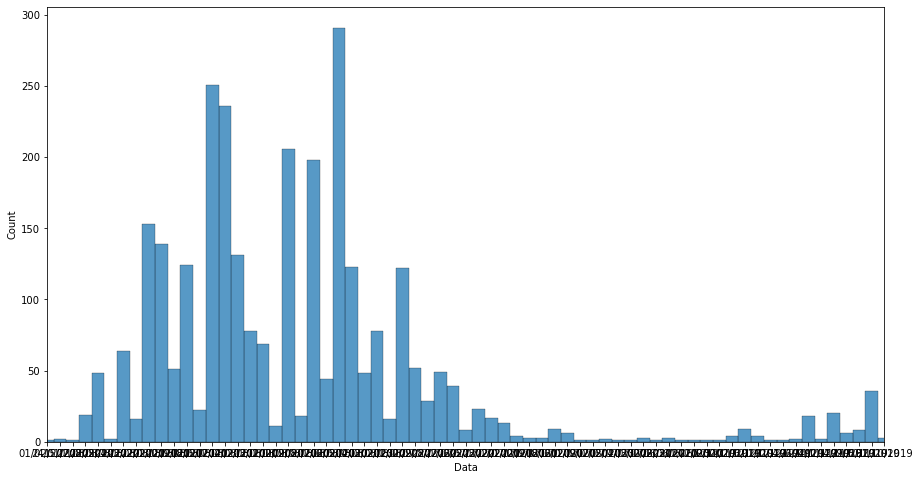

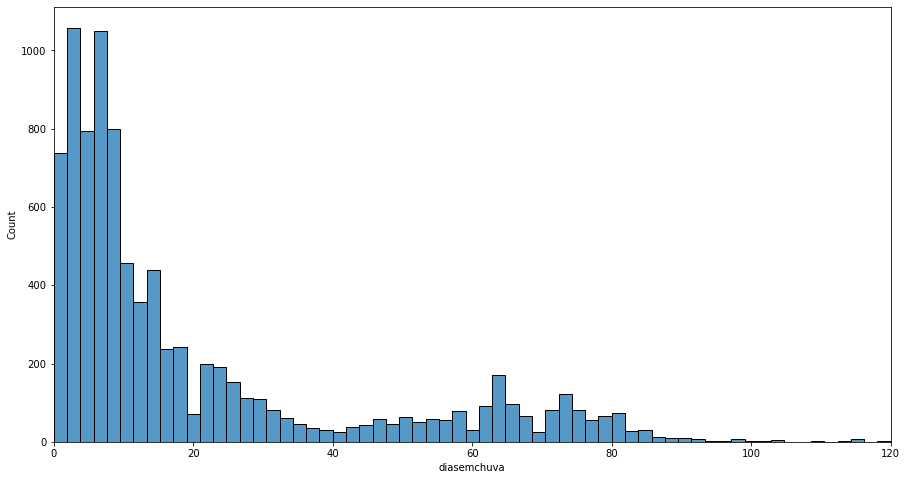

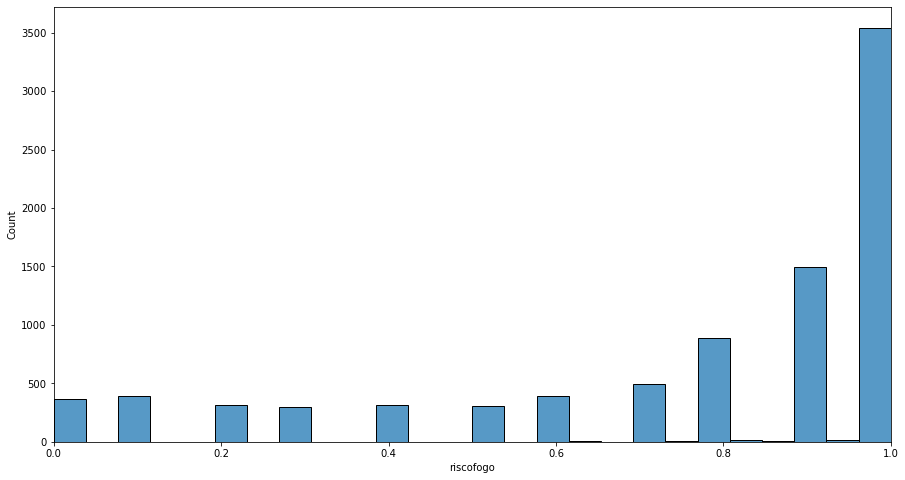

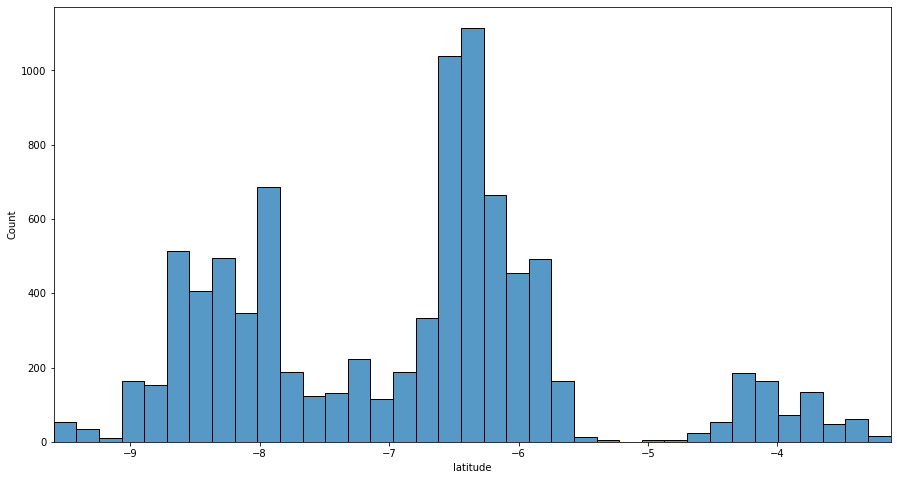

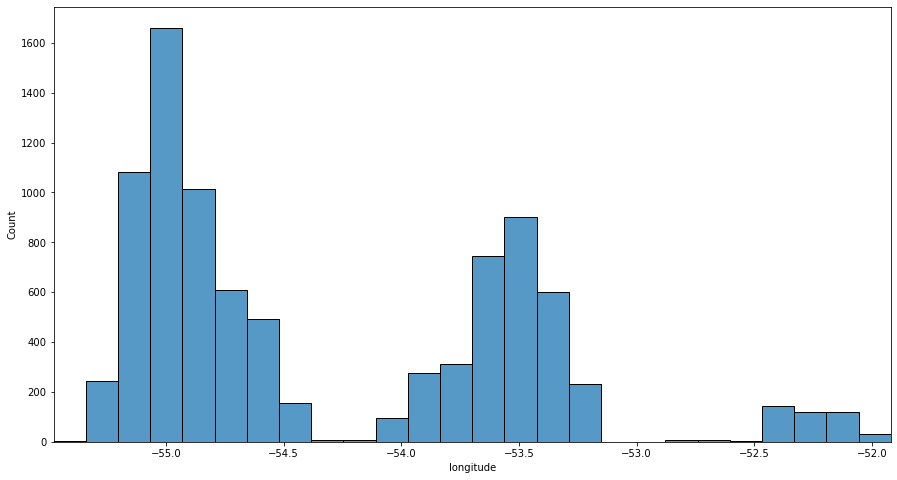

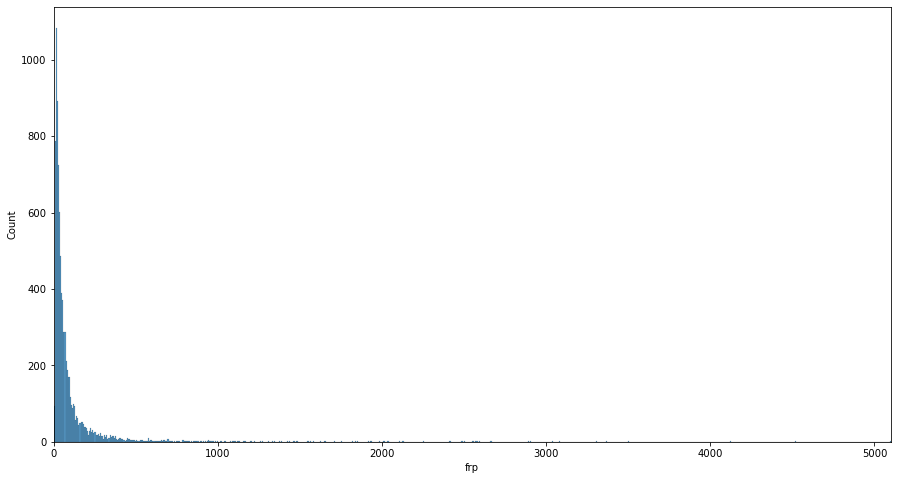

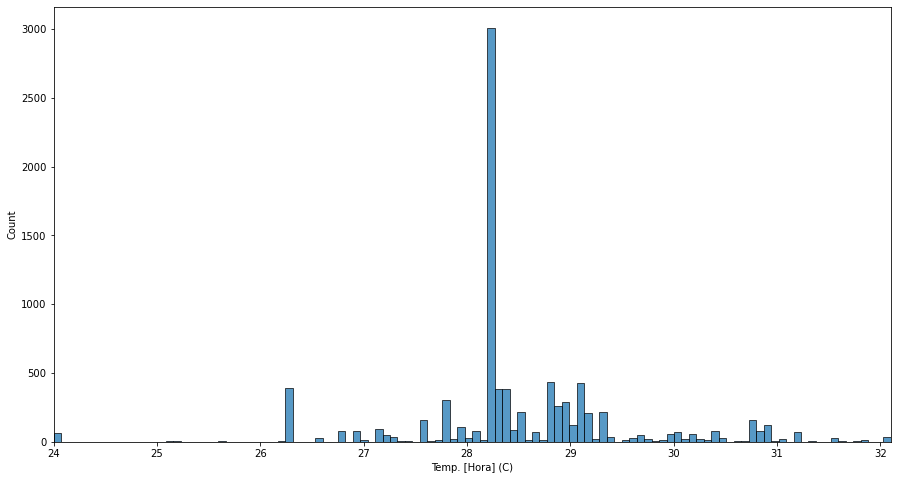

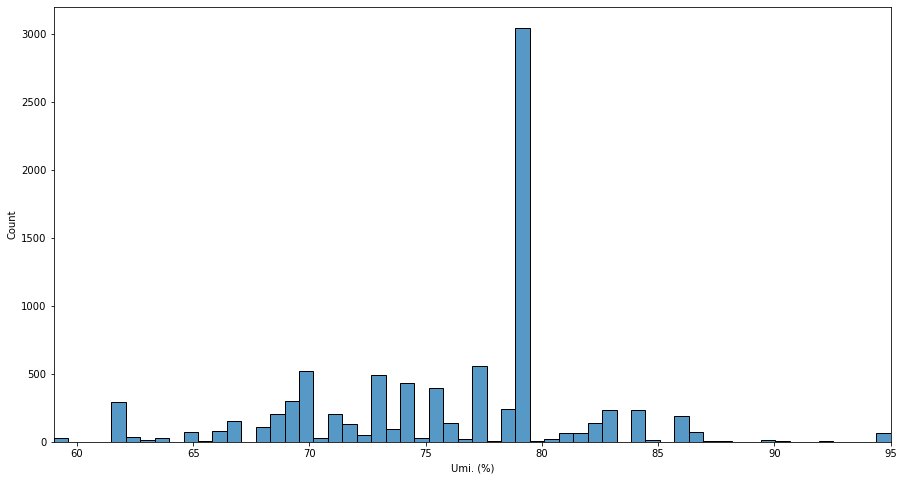

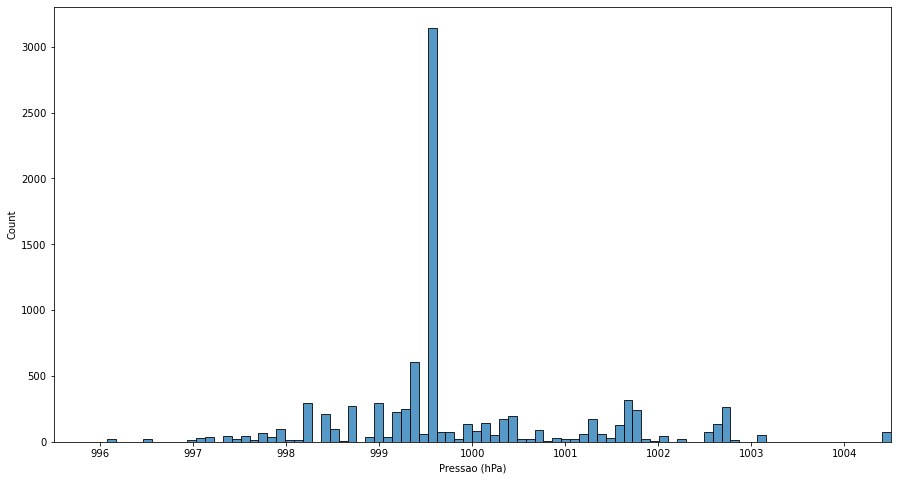

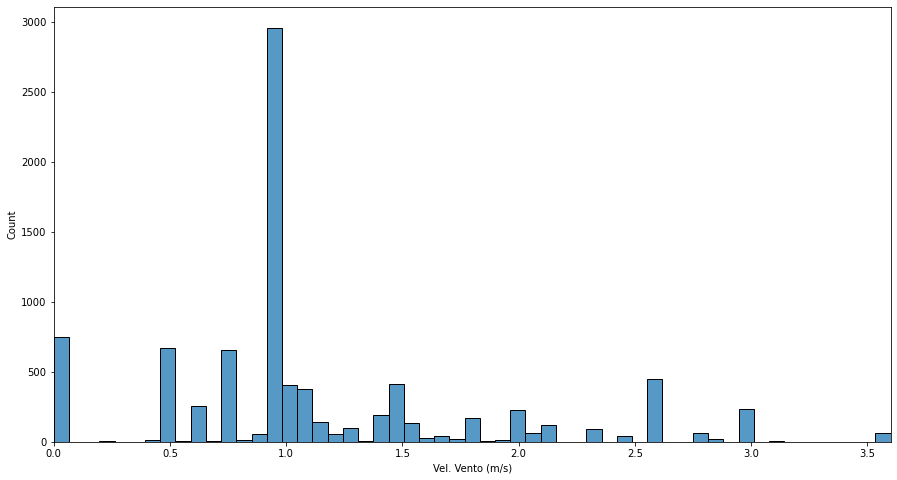

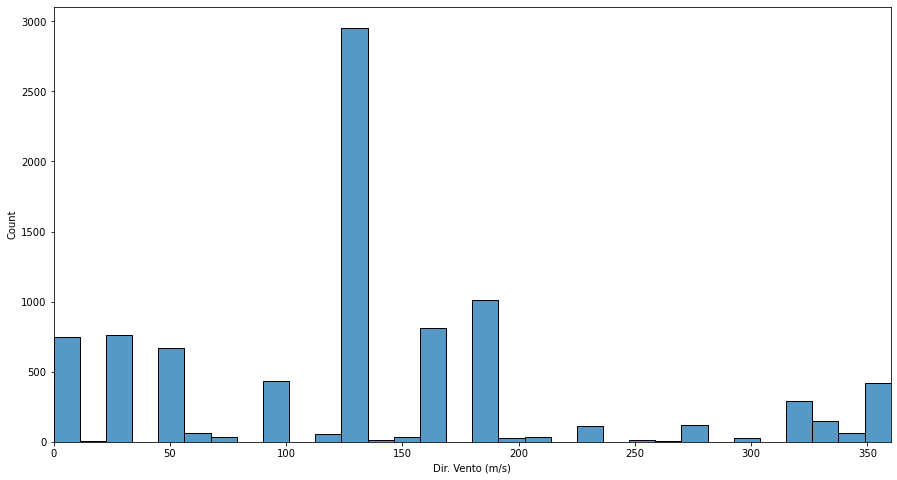

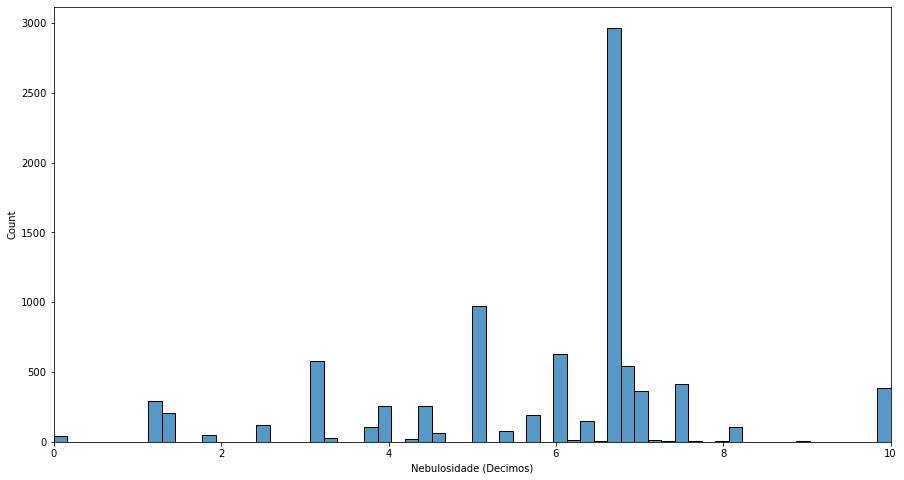

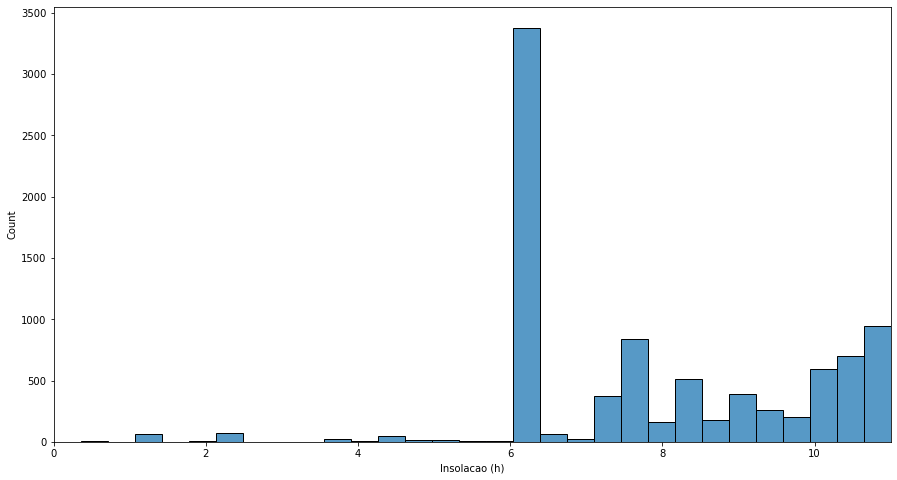

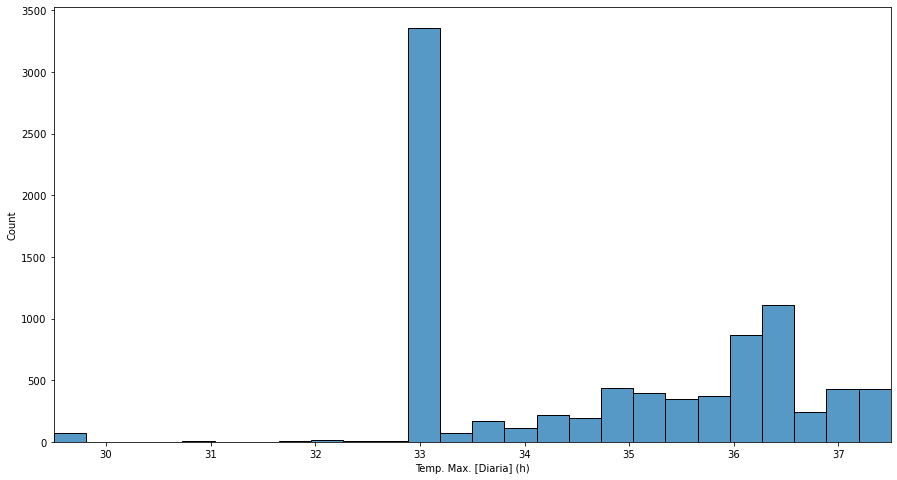

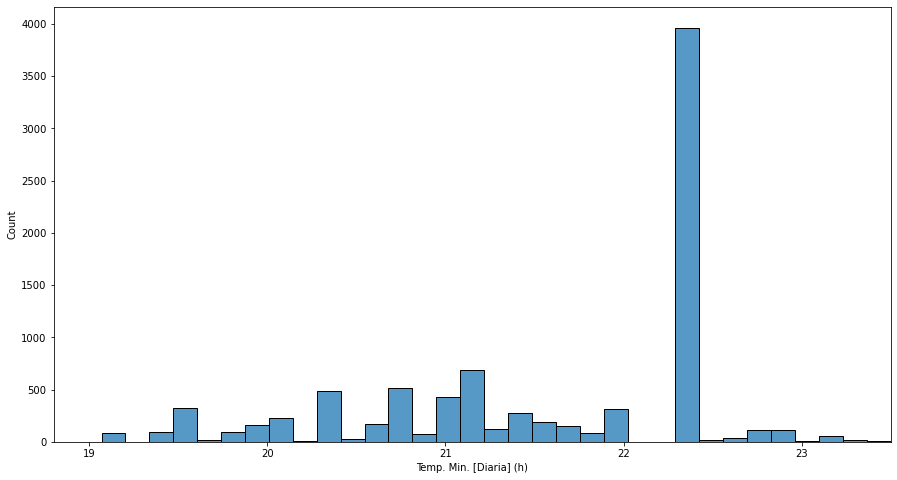

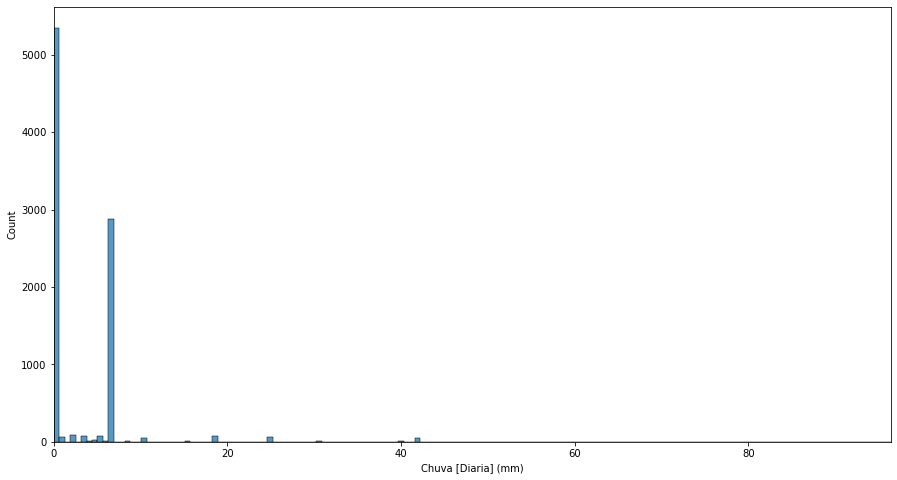

In [ ]:
lista_histplot=[]
for i in df_dropped_features.iloc[:]:
    lista_histplot.append(i)
for i in lista_histplot:
    plt.figure(figsize=(15,8))
    sns.histplot(df_dropped_features[i])
    plt.xlim(df_dropped_features[i].min(),df_dropped_features[i].max())
    plt.show()

In [ ]:
#Pelos histogramas
#Apesar de ter muitos dados com dias sem chuva entre 0 e 10 dias, também existem muitos dados com risco de fogo máximo

In [ ]:
#Criando a feature riscofogo_cat e adicionando no DataFrame

In [ ]:
lista_riscofogo_cat=[]
coluna_riscofogo=df_dropped_features.iloc[:,2]
for i in coluna_riscofogo:
    if i<=0.2:
        i='muito_baixo'
    elif 0.2<i<=0.4:
        i='baixo'
    elif 0.4<i<=0.6:
        i='medio'
    elif 0.6<i<=0.8:
        i='alto'
    elif 0.8<i<=1.0:
        i='muito_alto'
    lista_riscofogo_cat.append(i)
df_dropped_features['riscofogo_cat']= lista_riscofogo_cat

In [ ]:
df_dropped_features.head()

,Data,diasemchuva,riscofogo,latitude,longitude,frp,Temp. [Hora] (C),Umi. (%),Pressao (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Nebulosidade (Decimos),Insolacao (h),Temp. Max. [Diaria] (h),Temp. Min. [Diaria] (h),Chuva [Diaria] (mm),riscofogo_cat
0,07/10/2021,0.0,0.1,-8.09621,-54.77356,12.5,28.2,78.94,999.56,0.94,130.0,6.68,6.3,32.89,22.33,6.56,muito_baixo
1,07/10/2021,0.0,0.1,-8.18397,-54.81675,18.6,28.2,78.94,999.56,0.94,130.0,6.68,6.3,32.89,22.33,6.56,muito_baixo
2,07/10/2021,0.0,0.1,-8.19341,-54.81541,12.1,28.2,78.94,999.56,0.94,130.0,6.68,6.3,32.89,22.33,6.56,muito_baixo
3,07/10/2021,0.0,0.6,-8.20493,-55.17908,17.1,28.2,78.94,999.56,0.94,130.0,6.68,6.3,32.89,22.33,6.56,medio
4,07/10/2021,0.0,0.4,-8.27370,-54.79735,8.8,28.2,78.94,999.56,0.94,130.0,6.68,6.3,32.89,22.33,6.56,baixo


In [ ]:
df_dropped_features2=df_dropped_features.drop(columns=['Data','riscofogo','latitude','longitude'])
df_dropped_features2.head()

,diasemchuva,frp,Temp. [Hora] (C),Umi. (%),Pressao (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Nebulosidade (Decimos),Insolacao (h),Temp. Max. [Diaria] (h),Temp. Min. [Diaria] (h),Chuva [Diaria] (mm),riscofogo_cat
0,0.0,12.5,28.2,78.94,999.56,0.94,130.0,6.68,6.3,32.89,22.33,6.56,muito_baixo
1,0.0,18.6,28.2,78.94,999.56,0.94,130.0,6.68,6.3,32.89,22.33,6.56,muito_baixo
2,0.0,12.1,28.2,78.94,999.56,0.94,130.0,6.68,6.3,32.89,22.33,6.56,muito_baixo
3,0.0,17.1,28.2,78.94,999.56,0.94,130.0,6.68,6.3,32.89,22.33,6.56,medio
4,0.0,8.8,28.2,78.94,999.56,0.94,130.0,6.68,6.3,32.89,22.33,6.56,baixo


In [ ]:
df_agrupado_media=df_dropped_features2.groupby(['riscofogo_cat']).mean()
df_agrupado_media

,diasemchuva,frp,Temp. [Hora] (C),Umi. (%),Pressao (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Nebulosidade (Decimos),Insolacao (h),Temp. Max. [Diaria] (h),Temp. Min. [Diaria] (h),Chuva [Diaria] (mm)
riscofogo_cat,,,,,,,,,,,,
alto,13.106581,96.500930,28.456974,75.540081,1000.224225,0.885789,107.533381,5.527170,8.127682,34.515536,21.437339,3.052489
baixo,5.291057,66.805854,28.912493,75.798482,999.329919,1.129675,134.983740,6.177154,7.349268,33.787805,22.142114,4.499740
medio,6.375354,55.756676,28.627195,76.381747,999.552035,1.070014,131.909821,6.077446,7.505382,33.901133,21.892493,4.305864
muito_alto,29.134320,119.093528,28.353139,75.903215,1000.007202,1.218051,145.137081,5.696128,8.113905,35.095594,21.399176,2.246343
muito_baixo,3.620594,48.729035,28.772635,76.162140,999.246565,1.125915,138.222016,6.151459,7.368553,33.764768,21.940278,4.962041


In [ ]:
#Em média, uma temperatura máx diária de 35°, junto com uma insolação de 8 horas e 29 dias sem chuva tem um risco de fogo
#muito alto

In [ ]:
def grafico_boxplot(data, variable, label):

    if label == '': label = variable
    plt.figure(figsize=(12,8))
    sns.boxplot(x='riscofogo_cat', y=variable, data=data)
    plt.ylabel(label)
    plt.show()

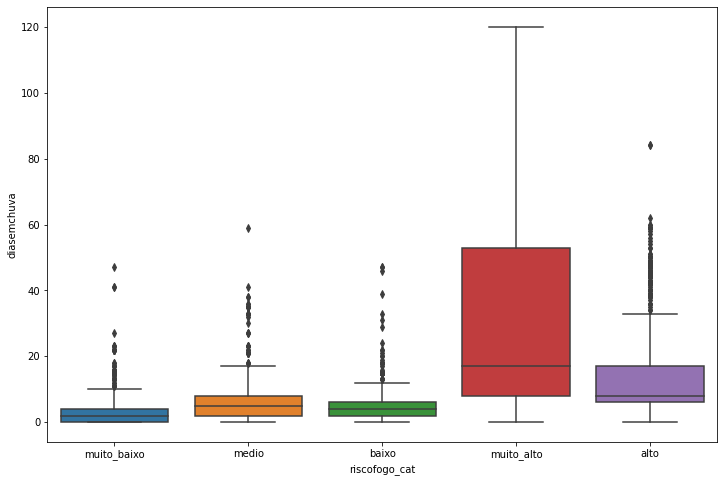

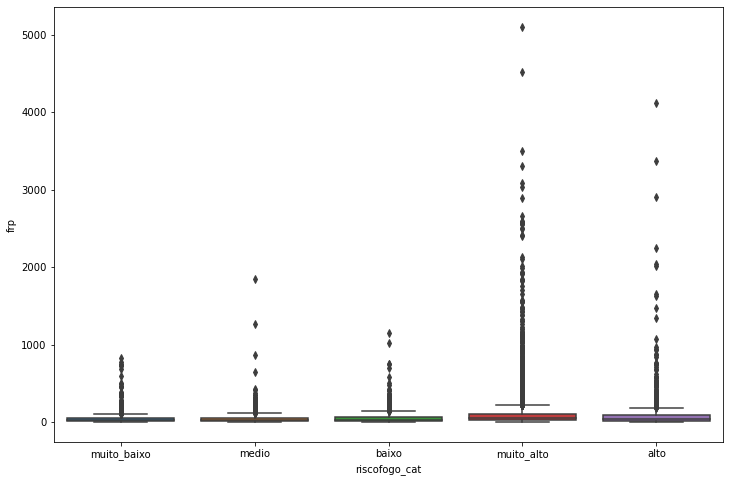

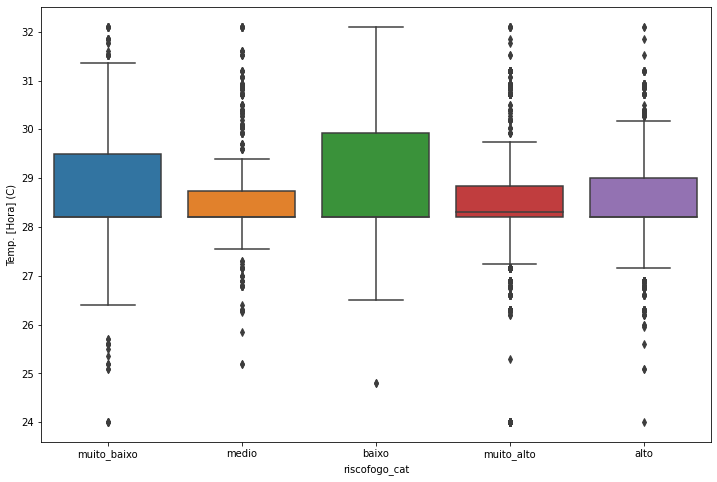

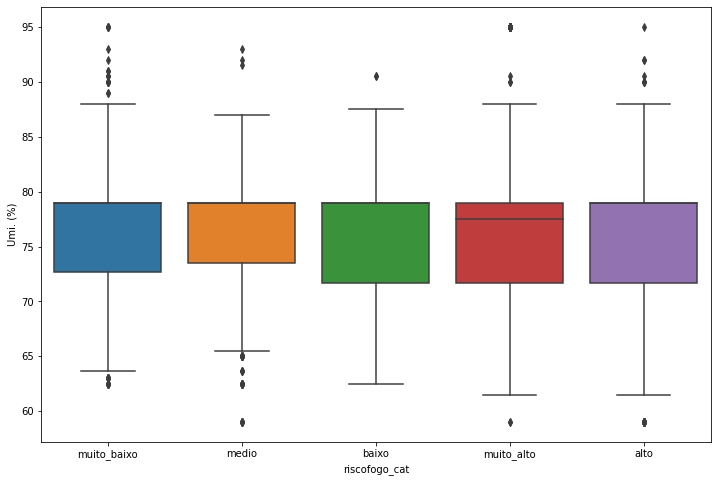

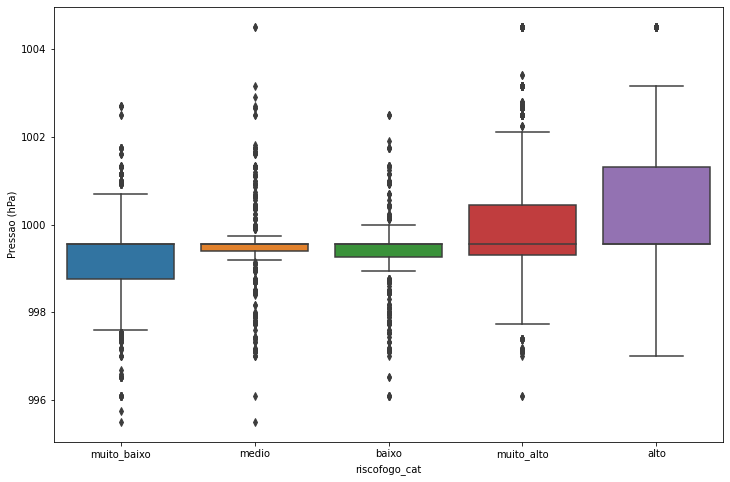

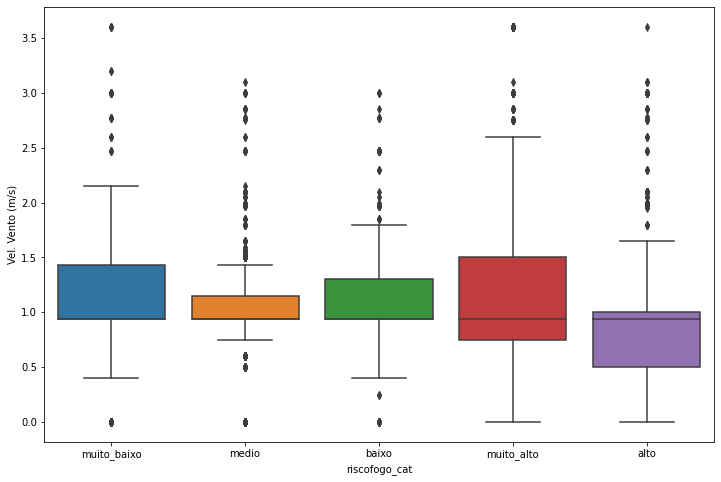

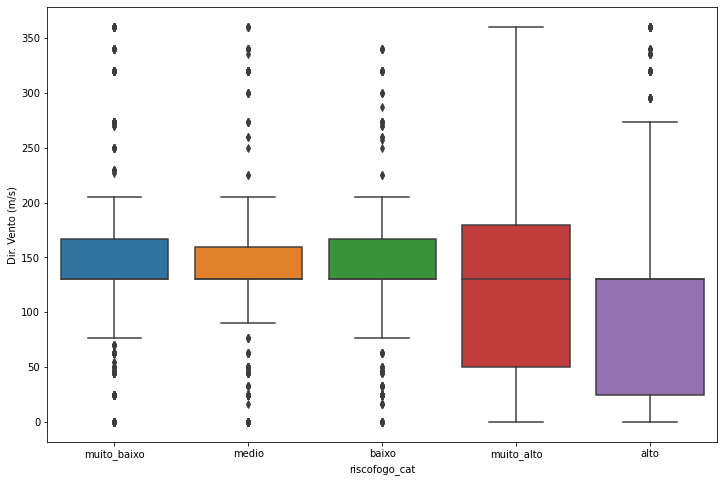

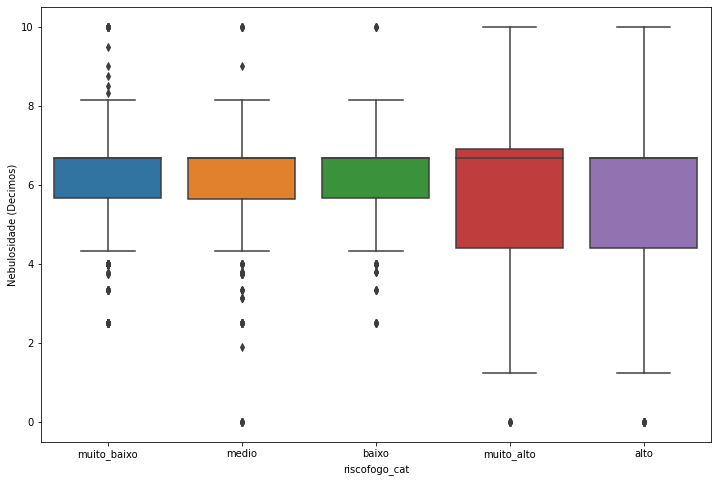

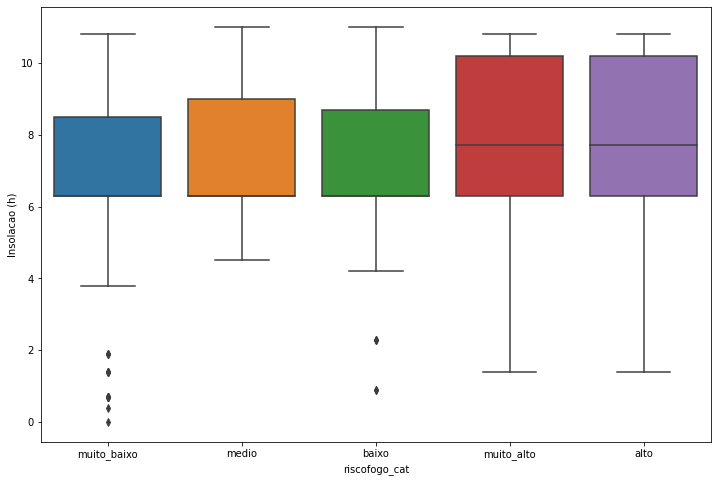

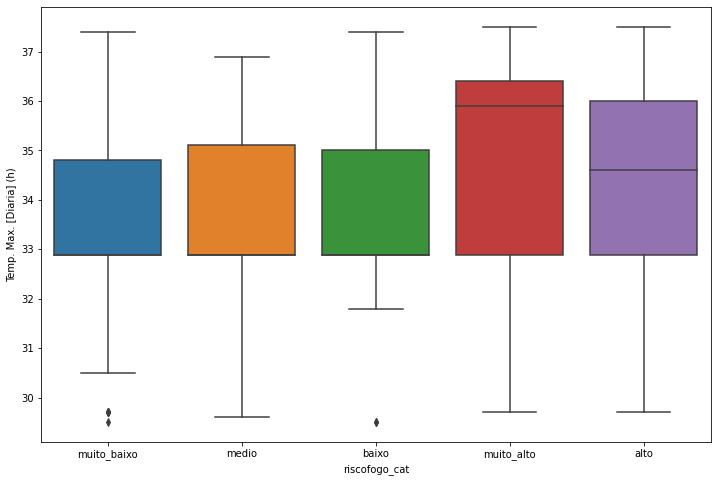

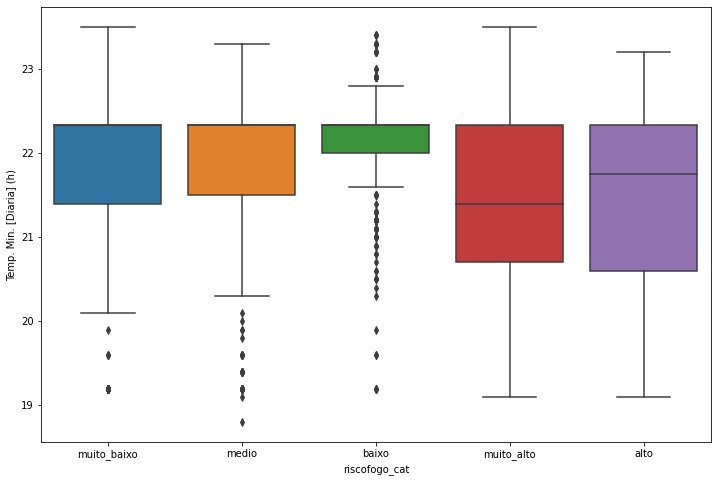

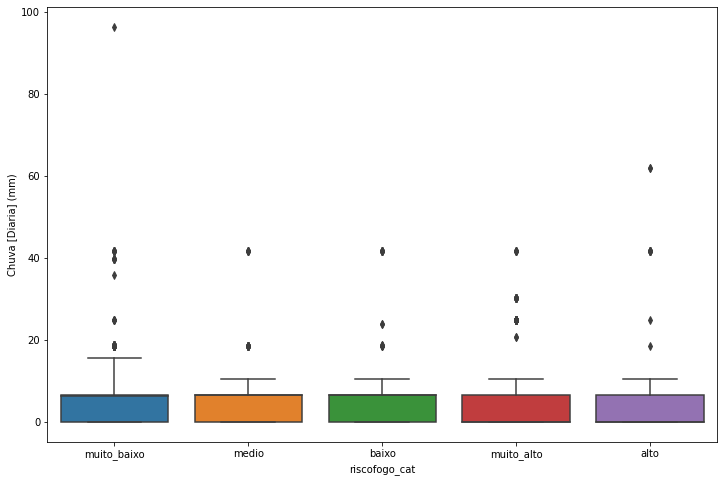

In [ ]:
variaveis=['diasemchuva','frp','Temp. [Hora] (C)','Umi. (%)','Pressao (hPa)','Vel. Vento (m/s)','Dir. Vento (m/s)',
          'Nebulosidade (Decimos)','Insolacao (h)','Temp. Max. [Diaria] (h)','Temp. Min. [Diaria] (h)',
           'Chuva [Diaria] (mm)']
for i in variaveis:
    grafico_boxplot(df_dropped_features2, i, "")

In [ ]:
#Observando os boxplots, as categorias 'muito alto' e 'alto' possuem maiores amplitudes dos dados nas seguintes features:
#Temp. mínima diária,Temp. máx diária, insolação, nebulosidade e Dir.Vento

<AxesSubplot:>

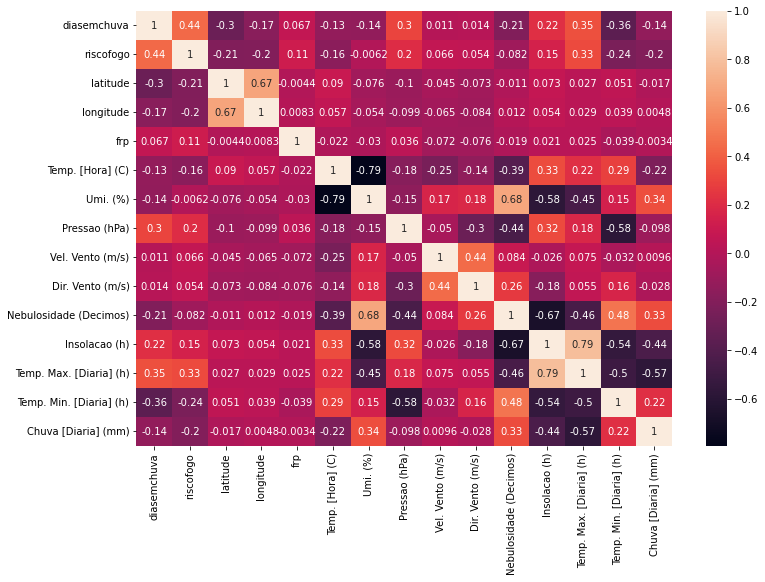

In [ ]:
correlacao=df_dropped_features.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlacao, annot=True)

In [ ]:
correlacao['riscofogo'].sort_values(ascending=True)

Temp. Min. [Diaria] (h)   -0.236574
latitude                  -0.211316
longitude                 -0.203274
Chuva [Diaria] (mm)       -0.200266
Temp. [Hora] (C)          -0.164185
Nebulosidade (Decimos)    -0.081718
Umi. (%)                  -0.006226
Dir. Vento (m/s)           0.054353
Vel. Vento (m/s)           0.066459
frp                        0.111979
Insolacao (h)              0.150604
Pressao (hPa)              0.203456
Temp. Max. [Diaria] (h)    0.326729
diasemchuva                0.438861
riscofogo                  1.000000
Name: riscofogo, dtype: float64

In [ ]:
#As variáveis 'diasemchuva' e 'Temp.Max.Diária' e 'Temp.Min'(de maneira inversa) têm as maiores correlações

In [ ]:
#Modelo de classificação(regressão logística)

In [ ]:
#Antes, definindo o DataFrame a ser utilizado nos modelos

In [ ]:
df_model=df_dropped_features2
df_model.head()

,diasemchuva,frp,Temp. [Hora] (C),Umi. (%),Pressao (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Nebulosidade (Decimos),Insolacao (h),Temp. Max. [Diaria] (h),Temp. Min. [Diaria] (h),Chuva [Diaria] (mm),riscofogo_cat
0,0.0,12.5,28.2,78.94,999.56,0.94,130.0,6.68,6.3,32.89,22.33,6.56,muito_baixo
1,0.0,18.6,28.2,78.94,999.56,0.94,130.0,6.68,6.3,32.89,22.33,6.56,muito_baixo
2,0.0,12.1,28.2,78.94,999.56,0.94,130.0,6.68,6.3,32.89,22.33,6.56,muito_baixo
3,0.0,17.1,28.2,78.94,999.56,0.94,130.0,6.68,6.3,32.89,22.33,6.56,medio
4,0.0,8.8,28.2,78.94,999.56,0.94,130.0,6.68,6.3,32.89,22.33,6.56,baixo


In [ ]:
#Criando a feature 'Ocorreu Incêndio' para poder aplicar a regressão logística

In [ ]:
lista_df_model=[]
b=df_model.iloc[:,12]
for i in b:
    if i=='muito_alto':
        i=1
    else:
        i=0
    lista_df_model.append(i)
df_model['Ocorreu Incêndio']= lista_df_model

In [ ]:
df_model=df_model.drop(columns=['riscofogo_cat'])

In [ ]:
df_model.head()

,diasemchuva,frp,Temp. [Hora] (C),Umi. (%),Pressao (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Nebulosidade (Decimos),Insolacao (h),Temp. Max. [Diaria] (h),Temp. Min. [Diaria] (h),Chuva [Diaria] (mm),Ocorreu Incêndio
0,0.0,12.5,28.2,78.94,999.56,0.94,130.0,6.68,6.3,32.89,22.33,6.56,0
1,0.0,18.6,28.2,78.94,999.56,0.94,130.0,6.68,6.3,32.89,22.33,6.56,0
2,0.0,12.1,28.2,78.94,999.56,0.94,130.0,6.68,6.3,32.89,22.33,6.56,0
3,0.0,17.1,28.2,78.94,999.56,0.94,130.0,6.68,6.3,32.89,22.33,6.56,0
4,0.0,8.8,28.2,78.94,999.56,0.94,130.0,6.68,6.3,32.89,22.33,6.56,0


In [ ]:
df_model.describe()

,diasemchuva,frp,Temp. [Hora] (C),Umi. (%),Pressao (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Nebulosidade (Decimos),Insolacao (h),Temp. Max. [Diaria] (h),Temp. Min. [Diaria] (h),Chuva [Diaria] (mm),Ocorreu Incêndio
count,8867.000000,8631.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000
mean,20.039698,97.753771,28.481127,75.908278,999.865729,1.136547,136.610278,5.788570,7.923977,34.656535,21.561784,3.023875,0.571783
std,23.371214,223.492175,1.089833,5.866688,1.309172,0.727517,92.904011,1.915477,1.935314,1.679460,0.953045,5.266869,0.494848
min,0.000000,0.000000,24.000000,59.000000,995.500000,0.000000,0.000000,0.000000,0.000000,29.500000,18.800000,0.000000,0.000000
25%,5.000000,20.850000,28.200000,72.500000,999.350000,0.750000,63.333333,5.000000,6.300000,32.890000,20.900000,0.000000,0.000000
50%,9.000000,40.900000,28.200000,78.500000,999.560000,0.940000,130.000000,6.680000,7.700000,35.000000,22.000000,0.000000,1.000000
75%,25.000000,87.900000,28.950000,78.940000,1000.350000,1.433333,180.000000,6.680000,10.000000,36.200000,22.330000,6.560000,1.000000
max,120.000000,5098.900000,32.100000,95.000000,1004.500000,3.600000,360.000000,10.000000,11.000000,37.500000,23.500000,96.400000,1.000000


In [ ]:
#Pelo o describe acima, percebi que a variável frp possui NaN. Não tinha percebido isso antes
#Vou substituir pela mediana(Valor indicado em 50% no describe)

In [ ]:
df_model['frp']=df_model['frp'].fillna(40.9)

In [ ]:
df_model.describe()

,diasemchuva,frp,Temp. [Hora] (C),Umi. (%),Pressao (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Nebulosidade (Decimos),Insolacao (h),Temp. Max. [Diaria] (h),Temp. Min. [Diaria] (h),Chuva [Diaria] (mm),Ocorreu Incêndio
count,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000
mean,20.039698,96.240577,28.481127,75.908278,999.865729,1.136547,136.610278,5.788570,7.923977,34.656535,21.561784,3.023875,0.571783
std,23.371214,220.687426,1.089833,5.866688,1.309172,0.727517,92.904011,1.915477,1.935314,1.679460,0.953045,5.266869,0.494848
min,0.000000,0.000000,24.000000,59.000000,995.500000,0.000000,0.000000,0.000000,0.000000,29.500000,18.800000,0.000000,0.000000
25%,5.000000,21.250000,28.200000,72.500000,999.350000,0.750000,63.333333,5.000000,6.300000,32.890000,20.900000,0.000000,0.000000
50%,9.000000,40.900000,28.200000,78.500000,999.560000,0.940000,130.000000,6.680000,7.700000,35.000000,22.000000,0.000000,1.000000
75%,25.000000,85.400000,28.950000,78.940000,1000.350000,1.433333,180.000000,6.680000,10.000000,36.200000,22.330000,6.560000,1.000000
max,120.000000,5098.900000,32.100000,95.000000,1004.500000,3.600000,360.000000,10.000000,11.000000,37.500000,23.500000,96.400000,1.000000


In [ ]:
#Divindo em treino e teste

In [ ]:
from sklearn.model_selection import train_test_split
X=df_model.drop(columns=['Ocorreu Incêndio'], axis=1)
y=df_model['Ocorreu Incêndio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train2=scaler.fit_transform(X_train)
X_test2=scaler.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr2=lr.fit(X_train2, y_train)

In [ ]:
lr_pred=lr2.predict(X_test2)

In [ ]:
#Plotando a matriz de confusão

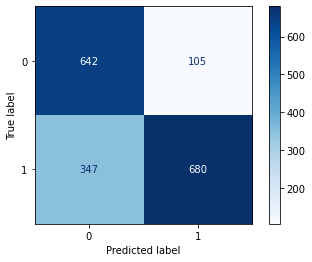

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr, X_test2, y_test, cmap='Blues')

In [ ]:
#A maior preocupação é quando o modelo faz a predição de que não ocorreu incêndio mas que verdadeiramente ocorreu, a matriz
#de confusão acima mostra que 347 vezes o modelo errou nesse sentido.

In [ ]:
#Plotando as métricas

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, plot_roc_curve

In [ ]:
print(f'Acurácia: {accuracy_score(y_test, lr_pred)}\nPrecisão: {precision_score(y_test,lr_pred)}\nRecall: {recall_score(y_test,lr_pred)}')

Acurácia: 0.7452085682074409
Precisão: 0.8662420382165605
Recall: 0.6621226874391432


In [ ]:
# Classificação por suport vector machine

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
svm_pred= svm.predict(X_test)

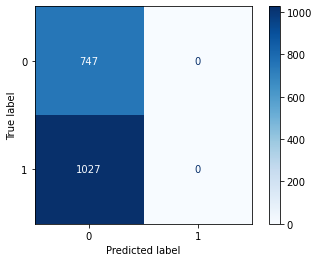

In [ ]:
plot_confusion_matrix(svm, X_test2, y_test, cmap='Blues')

In [ ]:
print(f'Acurácia:{accuracy_score(y_test,svm_pred)}\nPrecisão:{precision_score(y_test,svm_pred)}\nRecall:{recall_score(y_test,svm_pred)}')

Acurácia:0.7001127395715896
Precisão:0.8051787916152897
Recall:0.6358325219084713


In [ ]:
#O modelo de suport vector machine errou muito na situação mais crítica, que seria predizer que não ocorreria incêndio
#mas que na verdade ocorreu

In [ ]:
# Modelo k-nearest neighbors(Knn)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train2, y_train)
knn_pred = knn.predict(X_test2)

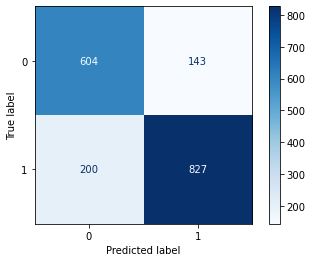

In [ ]:
plot_confusion_matrix(knn, X_test2, y_test, cmap='Blues')

In [ ]:
print(f'Acurácia:{accuracy_score(y_test,knn_pred)}\nPrecisão:{precision_score(y_test,knn_pred)}\nRecall:{recall_score(y_test,knn_pred)}')

Acurácia:0.8066516347237881
Precisão:0.8525773195876288
Recall:0.8052580331061344


In [ ]:
#Por enquanto o knn tem as melhores métricas

In [ ]:
#Modelo Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train2, y_train)
nb_pred = nb.predict(X_test2)

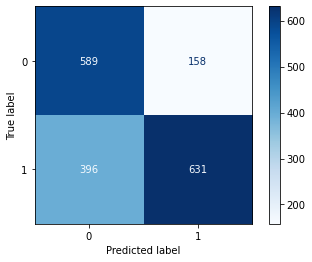

In [ ]:
plot_confusion_matrix(nb, X_test2, y_test, cmap='Blues')

In [ ]:
print(f'Acurácia:{accuracy_score(y_test,nb_pred)}\nPrecisão:{precision_score(y_test,nb_pred)}\nRecall:{recall_score(y_test,nb_pred)}')

Acurácia:0.6877113866967306
Precisão:0.7997465145754119
Recall:0.6144109055501461


In [ ]:
#O modelo Naive Bayes tem métricas menores do que o knn

In [ ]:
#Modelo Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train2, y_train)
dt_pred = dt.predict(X_test2)

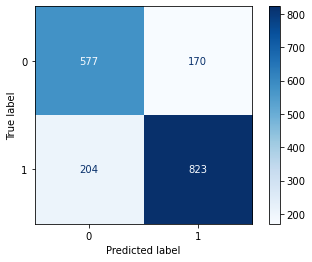

In [ ]:
plot_confusion_matrix(dt, X_test2, y_test, cmap='Blues')

In [ ]:
print(f'Acurácia:{accuracy_score(y_test,dt_pred)}\nPrecisão:{precision_score(y_test,dt_pred)}\nRecall:{recall_score(y_test,dt_pred)}')

Acurácia:0.7891770011273957
Precisão:0.8288016112789527
Recall:0.801363193768257


In [ ]:
#Montando a árvore

In [ ]:
features_names=[]
for i in df_model.iloc[0:0,:12]:
    features_names.append(i)

[Text(558.0, 570.7800000000001, 'diasemchuva <= -0.071\ngini = 0.49\nsamples = 7093\nvalue = [3050, 4043]\nclass = Sem incêndio'),
 Text(279.0, 407.70000000000005, 'Temp. Max. [Diaria] (h) <= 0.279\ngini = 0.415\nsamples = 2915\nvalue = [2057, 858]\nclass = Com incêndio'),
 Text(139.5, 244.62, 'diasemchuva <= -0.262\ngini = 0.349\nsamples = 2393\nvalue = [1854, 539]\nclass = Com incêndio'),
 Text(69.75, 81.53999999999996, 'gini = 0.205\nsamples = 1248\nvalue = [1103, 145]\nclass = Com incêndio'),
 Text(209.25, 81.53999999999996, 'gini = 0.451\nsamples = 1145\nvalue = [751, 394]\nclass = Com incêndio'),
 Text(418.5, 244.62, 'Umi. (%) <= -1.009\ngini = 0.475\nsamples = 522\nvalue = [203, 319]\nclass = Sem incêndio'),
 Text(348.75, 81.53999999999996, 'gini = 0.236\nsamples = 88\nvalue = [76, 12]\nclass = Com incêndio'),
 Text(488.25, 81.53999999999996, 'gini = 0.414\nsamples = 434\nvalue = [127, 307]\nclass = Sem incêndio'),
 Text(837.0, 407.70000000000005, 'diasemchuva <= 1.929\ngini = 0

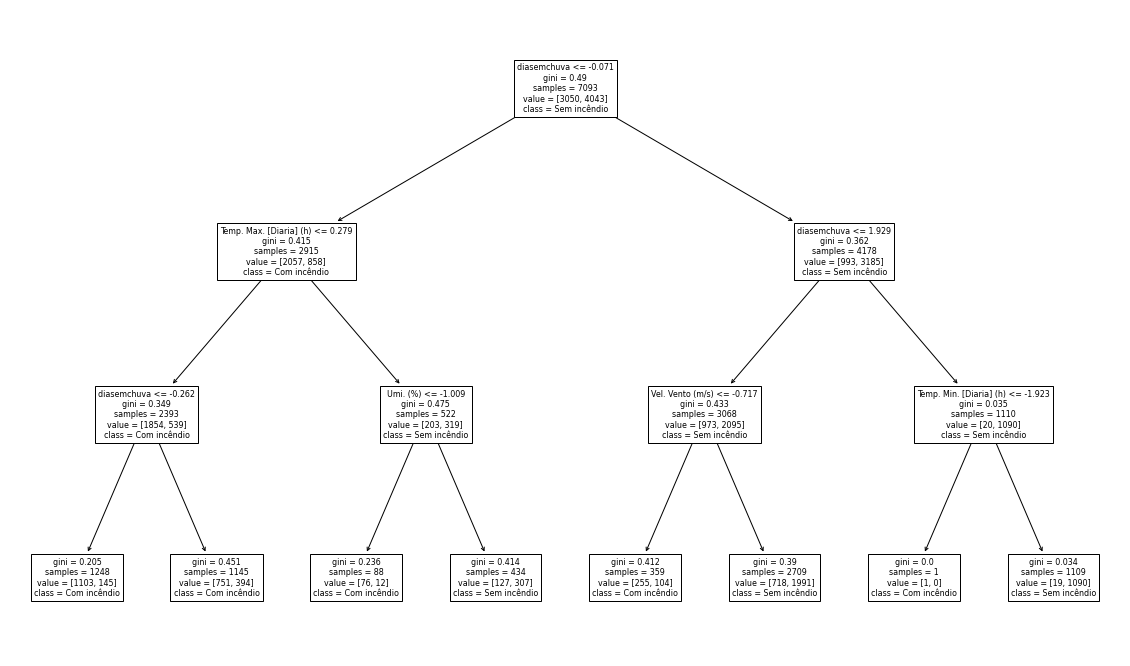

In [ ]:
plt.figure(figsize=(20,12))
plot_tree(dt, feature_names=features_names, class_names=['Com incêndio', 'Sem incêndio'])

In [ ]:
#Modelo RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(random_state=42)
rf.fit(X_train2, y_train)
rf_pred = rf.predict(X_test2)

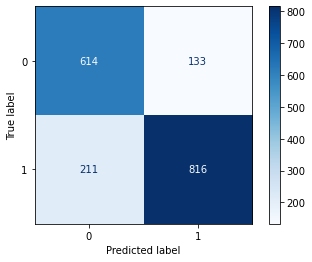

In [ ]:
plot_confusion_matrix(rf, X_test2, y_test, cmap='Blues')

In [ ]:
print(f'Acurácia:{accuracy_score(y_test,rf_pred)}\nPrecisão:{precision_score(y_test,rf_pred)}\nRecall:{recall_score(y_test,rf_pred)}')

Acurácia:0.8060879368658399
Precisão:0.8598524762908325
Recall:0.7945472249269717


In [ ]:
#Comparando os modelos

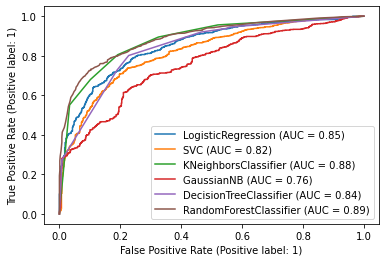

In [ ]:
classifiers = [lr, svm, knn, nb, dt, rf]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test2, y_test, ax=ax)

In [ ]:
#Melhor modelo foi Random forest

In [ ]:
#Tentando melhorar as métricas do modelo

In [ ]:
#Feature Engineering

In [ ]:
#Criando um novo DataFrame com novas features que serão criadas e incluídas

In [ ]:
df_new_features=df_model

In [ ]:
#As novas features criados serão nomeadas com 'nf' no início
#Criando uma feature com amplitude de temperatura diária

In [ ]:
#criando a variável 'amplitude_temp'
df_new_features['nf_amplitude_temp']=df_new_features['Temp. Max. [Diaria] (h)'] - df_new_features['Temp. Min. [Diaria] (h)']
df_new_features.head()

,diasemchuva,frp,Temp. [Hora] (C),Umi. (%),Pressao (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Nebulosidade (Decimos),Insolacao (h),Temp. Max. [Diaria] (h),Temp. Min. [Diaria] (h),Chuva [Diaria] (mm),Ocorreu Incêndio,nf_amplitude_temp
0,0.0,12.5,28.2,78.94,999.56,0.94,130.0,6.68,6.3,32.89,22.33,6.56,0,10.56
1,0.0,18.6,28.2,78.94,999.56,0.94,130.0,6.68,6.3,32.89,22.33,6.56,0,10.56
2,0.0,12.1,28.2,78.94,999.56,0.94,130.0,6.68,6.3,32.89,22.33,6.56,0,10.56
3,0.0,17.1,28.2,78.94,999.56,0.94,130.0,6.68,6.3,32.89,22.33,6.56,0,10.56
4,0.0,8.8,28.2,78.94,999.56,0.94,130.0,6.68,6.3,32.89,22.33,6.56,0,10.56


In [ ]:
#Na análise dos boxplots(EDA) algumas features tinham grande amplitude nos grupos de risco de fogo alto e muito alto. Então
#decidi criar novas features com a amplitude desses dados(Temp. min diária, Temp. max, insolação, nebulosidade e Dir.Vento)

In [ ]:
amplitude_temp_min=(df_new_features['Temp. Min. [Diaria] (h)'].max())-(df_new_features['Temp. Min. [Diaria] (h)'].min())
df_new_features['nf_temp_min']=amplitude_temp_min/df_new_features['Temp. Min. [Diaria] (h)']

In [ ]:
amplitude_temp_max=(df_new_features['Temp. Max. [Diaria] (h)'].max())-(df_new_features['Temp. Max. [Diaria] (h)'].min())
df_new_features['nf_temp_max']=amplitude_temp_max/df_new_features['Temp. Max. [Diaria] (h)']

In [ ]:
amplitude_insol=(df_new_features['Insolacao (h)'].max())-(df_new_features['Insolacao (h)'].min())
df_new_features['nf_insol']=df_new_features['Insolacao (h)']/amplitude_insol

In [ ]:
amplitude_nebul=(df_new_features['Nebulosidade (Decimos)'].max())-(df_new_features['Nebulosidade (Decimos)'].min())
df_new_features['nf_nebul']=df_new_features['Nebulosidade (Decimos)']/amplitude_nebul

In [ ]:
amplitude_dir_vento=(df_new_features['Dir. Vento (m/s)'].max())-(df_new_features['Dir. Vento (m/s)'].min())
df_new_features['nf_dir_vento']=df_new_features['Dir. Vento (m/s)']/amplitude_dir_vento

In [ ]:
#temp max diária e insolação tem alta correlação. Com essa informação, vou tentar criar uma nova feature

In [ ]:
df_new_features['nf_insol/Temp']=df_new_features['Insolacao (h)']/df_new_features['Temp. Max. [Diaria] (h)']

In [ ]:
df_new_features.head()

,diasemchuva,frp,Temp. [Hora] (C),Umi. (%),Pressao (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Nebulosidade (Decimos),Insolacao (h),Temp. Max. [Diaria] (h),Temp. Min. [Diaria] (h),Chuva [Diaria] (mm),Ocorreu Incêndio,nf_amplitude_temp,nf_temp_min,nf_temp_max,nf_insol,nf_nebul,nf_dir_vento,nf_insol/Temp
0,0.0,12.5,28.2,78.94,999.56,0.94,130.0,6.68,6.3,32.89,22.33,6.56,0,10.56,0.210479,0.243235,0.572727,0.668,0.361111,0.191548
1,0.0,18.6,28.2,78.94,999.56,0.94,130.0,6.68,6.3,32.89,22.33,6.56,0,10.56,0.210479,0.243235,0.572727,0.668,0.361111,0.191548
2,0.0,12.1,28.2,78.94,999.56,0.94,130.0,6.68,6.3,32.89,22.33,6.56,0,10.56,0.210479,0.243235,0.572727,0.668,0.361111,0.191548
3,0.0,17.1,28.2,78.94,999.56,0.94,130.0,6.68,6.3,32.89,22.33,6.56,0,10.56,0.210479,0.243235,0.572727,0.668,0.361111,0.191548
4,0.0,8.8,28.2,78.94,999.56,0.94,130.0,6.68,6.3,32.89,22.33,6.56,0,10.56,0.210479,0.243235,0.572727,0.668,0.361111,0.191548


In [ ]:
#Criando uma feature em que separa 'Vel.Vento' em três grupos

In [ ]:
df_new_features['nf_Vel.Vento']=pd.qcut(df_new_features['Vel. Vento (m/s)'], 3, labels=[1,2,3])

In [ ]:
#A chuva considerada forte é acima de 25mm. Então decidi criar uma feature que diz se houve, no dia, chuva forte ou não

In [ ]:
df_new_features['nf_chuva_forte']=(df_new_features['Chuva [Diaria] (mm)']>25)*1

In [ ]:
#Criando uma variável que diz se o ar é considerado seco ou não

In [ ]:
df_new_features['nf_umid_seco']=(df_new_features['Umi. (%)']>30)*1

In [ ]:
df_new_features.head()

,diasemchuva,frp,Temp. [Hora] (C),Umi. (%),Pressao (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Nebulosidade (Decimos),Insolacao (h),Temp. Max. [Diaria] (h),...,nf_amplitude_temp,nf_temp_min,nf_temp_max,nf_insol,nf_nebul,nf_dir_vento,nf_insol/Temp,nf_Vel.Vento,nf_chuva_forte,nf_umid_seco
0,0.0,12.5,28.2,78.94,999.56,0.94,130.0,6.68,6.3,32.89,...,10.56,0.210479,0.243235,0.572727,0.668,0.361111,0.191548,1,0,1
1,0.0,18.6,28.2,78.94,999.56,0.94,130.0,6.68,6.3,32.89,...,10.56,0.210479,0.243235,0.572727,0.668,0.361111,0.191548,1,0,1
2,0.0,12.1,28.2,78.94,999.56,0.94,130.0,6.68,6.3,32.89,...,10.56,0.210479,0.243235,0.572727,0.668,0.361111,0.191548,1,0,1
3,0.0,17.1,28.2,78.94,999.56,0.94,130.0,6.68,6.3,32.89,...,10.56,0.210479,0.243235,0.572727,0.668,0.361111,0.191548,1,0,1
4,0.0,8.8,28.2,78.94,999.56,0.94,130.0,6.68,6.3,32.89,...,10.56,0.210479,0.243235,0.572727,0.668,0.361111,0.191548,1,0,1


In [ ]:
df_new_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8867 entries, 0 to 8866
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   diasemchuva              8867 non-null   float64 
 1   frp                      8867 non-null   float64 
 2   Temp. [Hora] (C)         8867 non-null   float64 
 3   Umi. (%)                 8867 non-null   float64 
 4   Pressao (hPa)            8867 non-null   float64 
 5   Vel. Vento (m/s)         8867 non-null   float64 
 6   Dir. Vento (m/s)         8867 non-null   float64 
 7   Nebulosidade (Decimos)   8867 non-null   float64 
 8   Insolacao (h)            8867 non-null   float64 
 9   Temp. Max. [Diaria] (h)  8867 non-null   float64 
 10  Temp. Min. [Diaria] (h)  8867 non-null   float64 
 11  Chuva [Diaria] (mm)      8867 non-null   float64 
 12  Ocorreu Incêndio         8867 non-null   int64   
 13  nf_amplitude_temp        8867 non-null   float64 
 14  nf_temp_

In [ ]:
df_new_features.describe()

,diasemchuva,frp,Temp. [Hora] (C),Umi. (%),Pressao (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Nebulosidade (Decimos),Insolacao (h),Temp. Max. [Diaria] (h),...,Ocorreu Incêndio,nf_amplitude_temp,nf_temp_min,nf_temp_max,nf_insol,nf_nebul,nf_dir_vento,nf_insol/Temp,nf_chuva_forte,nf_umid_seco
count,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,...,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.0
mean,20.039698,96.240577,28.481127,75.908278,999.865729,1.136547,136.610278,5.788570,7.923977,34.656535,...,0.571783,13.094751,0.218420,0.231384,0.720362,0.578857,0.379473,0.227009,0.008007,1.0
std,23.371214,220.687426,1.089833,5.866688,1.309172,0.727517,92.904011,1.915477,1.935314,1.679460,...,0.494848,2.308965,0.009993,0.011301,0.175938,0.191548,0.258067,0.048101,0.089129,0.0
min,0.000000,0.000000,24.000000,59.000000,995.500000,0.000000,0.000000,0.000000,0.000000,29.500000,...,0.000000,8.700000,0.200000,0.213333,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,5.000000,21.250000,28.200000,72.500000,999.350000,0.750000,63.333333,5.000000,6.300000,32.890000,...,0.000000,10.560000,0.210479,0.220994,0.572727,0.500000,0.175926,0.191548,0.000000,1.0
50%,9.000000,40.900000,28.200000,78.500000,999.560000,0.940000,130.000000,6.680000,7.700000,35.000000,...,1.000000,13.300000,0.213636,0.228571,0.700000,0.668000,0.361111,0.210959,0.000000,1.0
75%,25.000000,85.400000,28.950000,78.940000,1000.350000,1.433333,180.000000,6.680000,10.000000,36.200000,...,1.000000,15.100000,0.224880,0.243235,0.909091,0.668000,0.500000,0.277473,0.000000,1.0
max,120.000000,5098.900000,32.100000,95.000000,1004.500000,3.600000,360.000000,10.000000,11.000000,37.500000,...,1.000000,16.900000,0.250000,0.271186,1.000000,1.000000,1.000000,0.309249,1.000000,1.0


In [ ]:
#Dividindo o DataFrame, com as novas features, em treino e teste

In [ ]:
from sklearn.model_selection import train_test_split
X=df_new_features.drop(columns=['Ocorreu Incêndio'], axis=1)
y=df_new_features['Ocorreu Incêndio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train2=scaler.fit_transform(X_train)
X_test2=scaler.fit_transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(random_state=42)
rf.fit(X_train2, y_train)
rf_pred = rf.predict(X_test2)

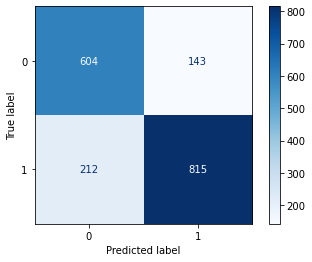

In [ ]:
plot_confusion_matrix(rf, X_test2, y_test, cmap='Blues')

In [ ]:
print(f'Acurácia:{accuracy_score(y_test,rf_pred)}\nPrecisão:{precision_score(y_test,rf_pred)}\nRecall:{recall_score(y_test,rf_pred)}')

Acurácia:0.7998872604284104
Precisão:0.8507306889352818
Recall:0.7935735150925024


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train2, y_train)
knn_pred = knn.predict(X_test2)

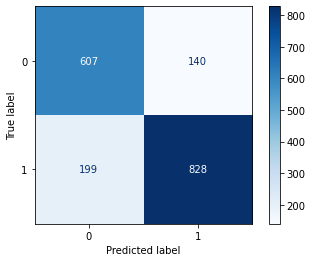

In [ ]:
plot_confusion_matrix(knn, X_test2, y_test, cmap='Blues')

In [ ]:
print(f'Acurácia:{accuracy_score(y_test,knn_pred)}\nPrecisão:{precision_score(y_test,knn_pred)}\nRecall:{recall_score(y_test,knn_pred)}')

Acurácia:0.8089064261555806
Precisão:0.8553719008264463
Recall:0.8062317429406037


In [ ]:
#Escolhi os dois melhores modelos(RandomForest e Knn) para tentar melhorar as métricas com a criação
# de novas features mas não houve melhoras significativas. Vou aplicar RandomSearch e Bayes Search no modelo
#RandomForest e verificar se melhora as métricas do modelo

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_dist  = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':list(range(6,20,2)),
    'max_leaf_nodes': list(range(2, 30, 2)),
    'min_samples_split': list(range(2, 25, 2)),
    'min_samples_leaf': list(range(2, 20, 3)),
}

rf_model = RandomForestClassifier(random_state=42)

model_randsearch = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    scoring='accuracy',
    n_jobs=4,
    cv=5,
    refit=True,
    return_train_score=True,
    n_iter = 100
)
model_randsearch.fit(X_train2, y_train,)
y_RSRF = model_randsearch.predict(X_test2)

C:\Users\gonza\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.8202441  0.76427181 0.82870225        nan
 0.83067597 0.83067607 0.74298275        nan 0.83321346 0.80572186
        nan 0.82926652 0.83321366 0.79825022 0.8310988  0.82799723
 0.82912508 0.82912528 0.74298275        nan 0.83152263        nan
        nan        nan 0.82912548        nan 0.80304173 0.83391878
        nan 0.76370833 0.83025353 0.81982087 0.80275994        nan
 0.79825022        nan 0.8298299  0.8202441         nan 0.82997134
 0.80304173 0.77667998        nan 0.80304173 0.82884339        nan
 0.82968985 0.76370833        nan        nan 0.82870225 0.82461417
        nan 0.74298275 0.7975454  0.83053552 0.83222715        nan
        nan 0.74030501 0.82997085        nan 0.83166357 0.82827912
 0.74298275 0.81403907 0.80304173        nan 0.78006304 0.8310994
 0.8131935  0.74030501        nan 0.83081781 0.8326499

In [ ]:
model_randsearch.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 11,
 'max_leaf_nodes': 28,
 'max_depth': 12,
 'criterion': 'entropy'}

In [ ]:
print(f'Acurácia:{accuracy_score(y_test,y_RSRF)}\nPrecisão:{precision_score(y_test,y_RSRF)}\nRecall:{recall_score(y_test,y_RSRF)}')

Acurácia:0.8235625704622322
Precisão:0.8650306748466258
Recall:0.8237585199610516


In [ ]:
#Com o Random Search houve melhora nas métricas
#Tentado com o Bayes Search

In [ ]:
!pip install scikit-optimize

In [ ]:
from skopt import BayesSearchCV

In [ ]:
from skopt.space import Real, Integer, Categorical

In [ ]:
params={
    'criterion':['gini', 'entropy',],
    'max_depth':list(range(6,20,2)),
    'max_leaf_nodes': list(range(2, 30, 2)),
    'min_samples_split': list(range(2, 25, 2)),
    'min_samples_leaf': list(range(2, 20, 3)),
}

rf_model = RandomForestClassifier(random_state=42)

RF_BayesSearch=BayesSearchCV(rf_model,params, n_iter=32,
                            scoring='accuracy', cv=5)
RF_BayesSearch.fit(X_train2, y_train)

BayesSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
              n_iter=32, scoring='accuracy',
              search_spaces={'criterion': ['gini', 'entropy'],
                             'max_depth': [6, 8, 10, 12, 14, 16, 18],
                             'max_leaf_nodes': [2, 4, 6, 8, 10, 12, 14, 16, 18,
                                                20, 22, 24, 26, 28],
                             'min_samples_leaf': [2, 5, 8, 11, 14, 17],
                             'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16,
                                                   18, 20, 22, 24]})

In [ ]:
y_BSRF=RF_BayesSearch.predict(X_test2)

In [ ]:
RF_BayesSearch.best_params_

OrderedDict([('criterion', 'entropy'),
             ('max_depth', 10),
             ('max_leaf_nodes', 28),
             ('min_samples_leaf', 5),
             ('min_samples_split', 10)])

In [ ]:
print(f'Acurácia:{accuracy_score(y_test,y_BSRF)}\nPrecisão:{precision_score(y_test,y_BSRF)}\nRecall:{recall_score(y_test,y_BSRF)}')

Acurácia:0.8246899661781285
Precisão:0.8668032786885246
Recall:0.8237585199610516


In [ ]:
#Persistindo o modelo para o disco

In [ ]:
joblib.dump(RF_BayesSearch, 'model2.pkl')

['model2.pkl']

In [ ]:
joblib.dump(df_new_features, 'df_new_features.py')

['df_new_features.py']